![Title](./Novoenzyme_Enzyme_Stability_1.jpg)
<br>
<br>
![Title](./Novoenzyme_Enzyme_Stability_2.jpg)
<br>
<br>
![Title](./Novoenzyme_Enzyme_Stability_3.jpg)
<br>
<br>
![Title](./Novoenzyme_Enzyme_Stability_4.jpg)
<br>
<br>
![Title](./Novoenzyme_Enzyme_Stability_5.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from difflib import SequenceMatcher
from sklearn.model_selection import train_test_split
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [2]:
novo = pd.read_csv('train.csv')
novo_update = pd.read_csv('train_updates_20220929.csv')

novo_update_seq_id = novo_update.pop('seq_id')
novo_update.dropna(how='all', inplace=True)
novo_update_ready = novo_update.merge(novo_update_seq_id, how='left', left_index=True, right_index=True)

novo.update(novo_update_ready)
novo['seq_id'] = novo['seq_id'].astype(int)
novo.set_index('seq_id', inplace=True)

print(novo.shape)
print(novo.columns)

(31390, 4)
Index(['protein_sequence', 'pH', 'data_source', 'tm'], dtype='object')


![Title](./Novoenzyme_Enzyme_Stability_6.jpg)

In [3]:
novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31390 entries, 0 to 31389
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   protein_sequence  31390 non-null  object 
 1   pH                31104 non-null  float64
 2   data_source       28043 non-null  object 
 3   tm                31390 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.2+ MB


In [4]:
novo['pH'].describe()

count    31104.000000
mean         6.890323
std          1.588809
min          1.990000
25%          7.000000
50%          7.000000
75%          7.000000
max         64.900000
Name: pH, dtype: float64

![Title](./Novoenzyme_Enzyme_Stability_7.jpg)

In [5]:
novo = novo.dropna(subset = 'pH')

![Title](./Novoenzyme_Enzyme_Stability_8.jpg)

In [6]:
novo['pH'][novo['pH'] > 14].unique()

array([48.4, 49. , 55.6, 64.9, 39. , 53.4])

In [7]:
novo['pH'][novo['pH'] > 14] = novo['pH'][novo['pH'] > 14] * 0.1
novo['pH'] = novo['pH'].round(1)

C:\Users\marcj\AppData\Local\Temp\ipykernel_8080\2319005900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo['pH'][novo['pH'] > 14] = novo['pH'][novo['pH'] > 14] * 0.1


![Title](./Novoenzyme_Enzyme_Stability_9.jpg)

In [8]:
novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31104 entries, 0 to 31389
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   protein_sequence  31104 non-null  object 
 1   pH                31104 non-null  float64
 2   data_source       27769 non-null  object 
 3   tm                31104 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.2+ MB


In [9]:
novo.corr()

C:\Users\marcj\AppData\Local\Temp\ipykernel_8080\609685233.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  novo.corr()


,pH,tm
pH,1.000000,0.072835
tm,0.072835,1.000000


![Title](./Novoenzyme_Enzyme_Stability_10.jpg)
![Title](./Novoenzyme_Enzyme_Stability_11.jpg)

In [10]:

novo['comp_score'] = np.nan

for value in range(0, len(novo)):
    comparison_score = SequenceMatcher(a = novo['protein_sequence'].iloc[value], b = novo['protein_sequence'].iloc[14318]).ratio()
    novo['comp_score'].iloc[value] = comparison_score
novo.head()

C:\Users\marcj\AppData\Local\Temp\ipykernel_8080\2308788498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo['comp_score'].iloc[value] = comparison_score


,protein_sequence,pH,data_source,tm,comp_score
seq_id,,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,0.148297
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,0.153153
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,0.128244
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,0.080378
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,0.045991


In [11]:
novo['comp_score'].describe()

count    31104.000000
mean         0.142037
std          0.055970
min          0.005224
25%          0.099066
50%          0.139674
75%          0.180791
max          1.000000
Name: comp_score, dtype: float64

In [12]:
novo.corr()

C:\Users\marcj\AppData\Local\Temp\ipykernel_8080\609685233.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  novo.corr()


,pH,tm,comp_score
pH,1.000000,0.072835,-0.197563
tm,0.072835,1.000000,0.010359
comp_score,-0.197563,0.010359,1.000000


![Title](./Novoenzyme_Enzyme_Stability_12.jpg)
![Title](./Novoenzyme_Enzyme_Stability_13.jpg)

In [13]:
novo['mol_wt'] = np.nan
novo['instability'] = np.nan
novo['gravy'] = np.nan
novo['aromaticity'] = np.nan

for value in range(0, len(novo)):
    proto_an = ProteinAnalysis(novo['protein_sequence'].iloc[value])
    novo['mol_wt'].iloc[value] = proto_an.molecular_weight()
    novo['instability'].iloc[value] = proto_an.instability_index()
    novo['gravy'].iloc[value] = proto_an.gravy()
    novo['aromaticity'].iloc[value] = proto_an.aromaticity()

C:\Users\marcj\AppData\Local\Temp\ipykernel_8080\3509864698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo['mol_wt'].iloc[value] = proto_an.molecular_weight()
C:\Users\marcj\AppData\Local\Temp\ipykernel_8080\3509864698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo['instability'].iloc[value] = proto_an.instability_index()
C:\Users\marcj\AppData\Local\Temp\ipykernel_8080\3509864698.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [14]:
novo.corr()

C:\Users\marcj\AppData\Local\Temp\ipykernel_8080\609685233.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  novo.corr()


,pH,tm,comp_score,mol_wt,instability,gravy,aromaticity
pH,1.000000,0.072835,-0.197563,0.064199,0.158731,0.048505,0.001549
tm,0.072835,1.000000,0.010359,-0.060967,-0.028351,0.159549,-0.021780
comp_score,-0.197563,0.010359,1.000000,-0.401423,-0.251892,0.048043,0.069891
mol_wt,0.064199,-0.060967,-0.401423,1.000000,0.164447,-0.087025,-0.078446
instability,0.158731,-0.028351,-0.251892,0.164447,1.000000,-0.374128,-0.199246
gravy,0.048505,0.159549,0.048043,-0.087025,-0.374128,1.000000,0.131993
aromaticity,0.001549,-0.021780,0.069891,-0.078446,-0.199246,0.131993,1.000000


![Title](./Novoenzyme_Enzyme_Stability_14.jpg)

In [19]:
X = np.array(novo[['pH', 'comp_score', 'mol_wt', 'instability', 'gravy', 'aromaticity']])
y = np.array(novo['tm'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [24]:
from lazypredict.Supervised import LazyRegressor

Lazy = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = Lazy.fit(X_train, X_test, y_train, y_test)
print(models)
print(predictions)

 38%|███▊      | 16/42 [21:12<1:01:45, 142.53s/it]c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
 40%|████      | 17/42 [21:13<42:16, 101.46s/it]  c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale t

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
LGBMRegressor                                0.31       0.31   11.62   
HistGradientBoostingRegressor                0.31       0.31   11.64   
XGBRegressor                                 0.29       0.29   11.74   
RandomForestRegressor                        0.27       0.27   11.92   
ExtraTreesRegressor                          0.24       0.24   12.21   
GradientBoostingRegressor                    0.22       0.22   12.36   
BaggingRegressor                             0.21       0.21   12.40   
KNeighborsRegressor                          0.19       0.19   12.54   
MLPRegressor                                 0.16       0.16   12.81   
NuSVR                                        0.10       0.10   13.28   
SVR                                          0.08       0.08   13.38   
OrthogonalMatchingPursuitCV                  0.03       0.03   1

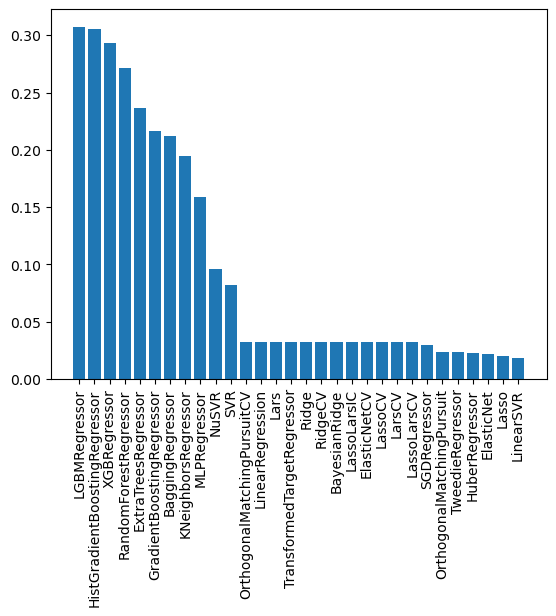

In [36]:
plt.bar(models[models['R-Squared'] >= 0].index, models[models['R-Squared'] >= 0]['R-Squared'])
plt.xticks(rotation = 90)
plt.show()


![Title](./Novoenzyme_Enzyme_Stability_15.jpg)
![Title](./Novoenzyme_Enzyme_Stability_16.jpg)

In [74]:
import lightgbm as ltb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint

LGMBR = ltb.LGBMRegressor()
model_params = {
    'learning_rate': uniform(),
    'subsample': uniform(),
    'n_estimators': randint(100, 1000),
    'max_depth' : randint(4, 10)
}

clf = RandomizedSearchCV(LGMBR, model_params, n_iter = 10, cv = 5)

model_1 = clf.fit(X_train, y_train)

model_1_score = model_1.best_estimator_.score(X_test, y_test)

print('Light GBM\'s Score: ', model_1_score)

Light GBM's Score:  0.2985351687875527


In [76]:
from sklearn.ensemble import HistGradientBoostingRegressor

HGBR = HistGradientBoostingRegressor()
model_params = {
    'learning_rate': uniform(),
    'max_iter': randint(10, 500),
    'max_leaf_nodes': randint(10, 100)
}

clf = RandomizedSearchCV(HGBR, model_params, n_iter = 10, cv = 5)

model_2 = clf.fit(X_train, y_train)

model_2_score = model_2.best_estimator_.score(X_test, y_test)

print('Histogram-Based Gradient Boosting Regression Tree\'s Score: ', model_2_score)


Histogram-Based Gradient Boosting Regression Tree's Score:  0.29781415151021395


In [77]:
import xgboost as xgb

XGB = xgb.XGBRegressor()
model_params = {
    'learning_rate' : uniform(),
    'max_depth' : randint(1, 20),
    'min_child_weight' : randint(1, 10),
    'gamma': uniform(),
    'colsample_bytree' : uniform()
}

clf = RandomizedSearchCV(XGB, model_params, n_iter = 10, cv = 5)

model_3 = clf.fit(X_train, y_train)

model_3_score = model_3.best_estimator_.score(X_test, y_test)

print('XGBoost\'s Score: ', model_3_score)

XGBoost's Score:  0.2918147169569595


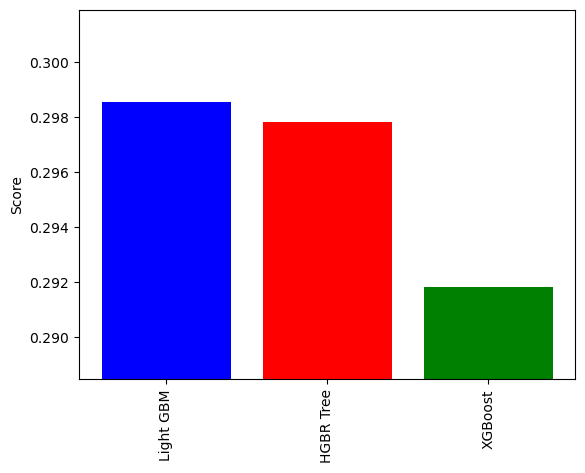

In [81]:
model_list = ['Light GBM', 'HGBR Tree', 'XGBoost']
model_values = [model_1_score, model_2_score, model_3_score]

high = max(model_values)
low = min(model_values)
diff = high - low

plt.ylim([low-(diff*0.5), high+(diff*0.5)])
plt.bar(model_list, model_values, color = ['blue', 'red', 'green'])
plt.xticks(rotation = 90)
plt.ylabel('Score')
plt.show()

![Title](./Novoenzyme_Enzyme_Stability_17.jpg)